In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Step 1: Generate a synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

In [8]:
# Step 2: Split the dataset into features (X) and target variable (y)
X = X.reshape(-1, 1)

In [9]:
# Step 3: Implement the Locally Weighted Regression algorithm
def locally_weighted_regression(query_point, X, y, tau):
    m, n = X.shape
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    X_weights = X * weights[:, np.newaxis]
    theta = np.linalg.inv(X_weights.T @ X) @ (X_weights.T @ y)
    prediction = np.dot(query_point, theta)
    return prediction

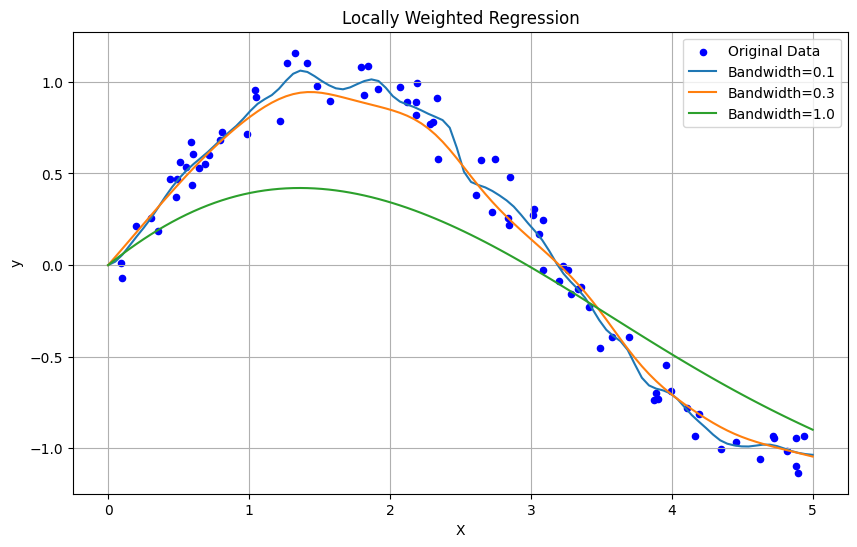

In [10]:
# Step 4 and 5: Experiment with multiple query points and bandwidths
query_points = np.linspace(0, 5, 100)  # Query points across the range of the dataset
bandwidths = [0.1, 0.3, 1.0]  # Different bandwidths

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', label='Original Data', s=20)

for bandwidth in bandwidths:
    predictions = [locally_weighted_regression(q, X, y, bandwidth) for q in query_points]
    plt.plot(query_points, predictions, label=f'Bandwidth={bandwidth}')

plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#Step 1: Generate a synthetic dataset

-We start by generating a synthetic dataset with 80 data points. Each data point consists of an x-coordinate (X) and a corresponding y-coordinate (y). The y-coordinate is calculated by applying the sine function to the x-coordinate and adding some random noise.

#Step 2: Split the dataset

-We reshape the X variable to ensure it has the correct shape for further calculations. This step is often necessary when working with NumPy arrays.

#Step 3: Implement the Locally Weighted Regression algorithm

-We define a function called locally_weighted_regression that calculates the locally weighted prediction for a given query point. This function takes as input the query point, the dataset (X and y), and a bandwidth parameter (tau).
Inside the function, we calculate weights for each data point based on their proximity to the query point. The closer a data point is to the query point, the higher its weight.
We then use these weights to compute the optimal linear regression parameters (theta) for the locally weighted model.
Finally, we use theta to make a prediction for the query point.

#Step 4 and 5: Experiment with multiple query points and bandwidths

-We define a range of query points spanning the x-axis of the dataset. These query points will be used to evaluate the LWR model at various positions.
We also specify a list of different bandwidth values (0.1, 0.3, and 1.0) to experiment with. The bandwidth determines how much each data point contributes to the prediction at a given query point. Smaller bandwidths give more weight to nearby points, while larger bandwidths consider a wider neighborhood.

#Results and Findings:

-We create a plot that visualizes the LWR results:
The blue points in the plot represent the original dataset.
For each bandwidth value, we calculate and plot the fitted curve (the predicted values) for the query points.
As the bandwidth increases, the LWR model becomes smoother and less sensitive to individual data points. Smaller bandwidths lead to more localized and flexible predictions.
For small bandwidths (e.g., 0.1), the fitted curve closely follows the original data points, capturing their local variations.
For larger bandwidths (e.g., 1.0), the fitted curve becomes smoother and approximates the sinusoidal pattern with less sensitivity to individual data points.
The choice of bandwidth is a trade-off between bias and variance: smaller bandwidths have lower bias but higher variance, while larger bandwidths have higher bias but lower variance.
In summary, this implementation of the LWR algorithm allows us to fit data points by assigning different weights to each point based on its proximity to the query point. The choice of bandwidth influences the trade-off between flexibility and smoothness in the fitted curves, and this can be adjusted based on the specific requirements of a regression task.